# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

Attached my work to Github file

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.1

In [3]:
cars_df = pd.read_csv("cars_hw.csv")
cars_df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
print(cars_df.info()) #Look at data
print(cars_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

In [5]:
cars_df = cars_df.dropna() #Dropped NA values

In [6]:
cars_df["No_of_Owners"]= cars_df["No_of_Owners"].str.replace(r"\D+", "", regex=True).astype(int) #Remove words/symbols and only keep numbers, turning them to integers

display(cars_df.dtypes)

,0
Unnamed: 0,int64
Make,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,int64
No_of_Owners,int64
Seating_Capacity,int64
Fuel_Type,object
Transmission,object


In [7]:
num_cols = cars_df.select_dtypes(include=[np.number]).columns #Identify numeric columns for transformation

for col in num_cols:
    if (cars_df[col] > 0).all():  #If all positive, safe for log
        skew = cars_df[col].skew()
        if abs(skew) > 1:  #only if highly skewed
            cars_df[col] = np.log1p(cars_df[col])  #log(1+x) to handle 0 safely
    else:
        # for columns that have 0 or negative values, use archsinh transformation
        cars_df[col] = np.arcsinh(cars_df[col])

In [8]:
Q1 = cars_df[num_cols].quantile(0.25) #Remove any outliers
Q3 = cars_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
cars_df = cars_df[~((cars_df[num_cols] < (Q1 - 1.5 * IQR)) | (cars_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
print("After cleaning:") #Verify data has been cleaned
print(cars_df.describe())

After cleaning:
       Unnamed: 0    Make_Year   Mileage_Run  No_of_Owners  Seating_Capacity  \
count  777.000000   777.000000    777.000000  7.770000e+02      7.770000e+02   
mean   488.118404  2017.270270  39541.619048  6.931472e-01      1.791759e+00   
std    281.766059     2.748768  24596.885179  1.110938e-15      2.221876e-16   
min      1.000000  2011.000000   1117.000000  6.931472e-01      1.791759e+00   
25%    247.000000  2015.000000  19949.000000  6.931472e-01      1.791759e+00   
50%    492.000000  2018.000000  33661.000000  6.931472e-01      1.791759e+00   
75%    732.000000  2019.000000  55670.000000  6.931472e-01      1.791759e+00   
max    976.000000  2022.000000  99495.000000  6.931472e-01      1.791759e+00   

            Price  
count  777.000000  
mean    13.434523  
std      0.443777  
min     12.375820  
25%     13.102163  
50%     13.428378  
75%     13.693344  
max     14.518113  


2.2

In [10]:
descr = cars_df["Price"].describe() #Generate a summary for Price
print(descr, '\n')

count    777.000000
mean      13.434523
std        0.443777
min       12.375820
25%       13.102163
50%       13.428378
75%       13.693344
max       14.518113
Name: Price, dtype: float64 



<Axes: ylabel='Density'>

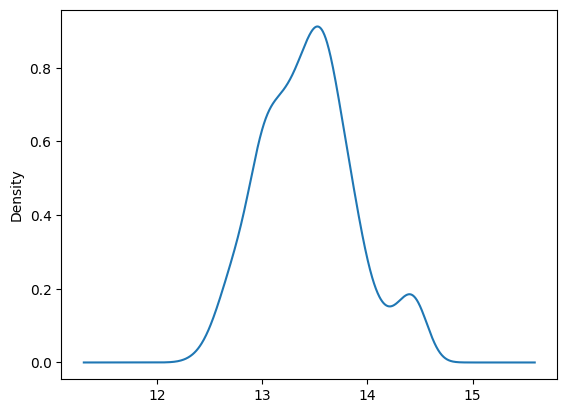

In [11]:
var = "Price"
cars_df[var].plot.density() #kernel_density plot

In [12]:
descriptions_by_make = cars_df.groupby("Make")["Price"].describe() #Description of Price conditional on Make
descriptions_by_make

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919898,0.480974,12.495008,12.568395,12.752289,13.171683,13.701223
Datsun,2.0,12.575256,0.051315,12.538971,12.557113,12.575256,12.593398,12.611541
Ford,45.0,13.493186,0.176232,13.163507,13.375456,13.496683,13.575985,13.879425
Honda,57.0,13.600160,0.327315,12.736704,13.345509,13.643536,13.797348,14.245344
Hyundai,247.0,13.407533,0.389690,12.517231,13.153862,13.401511,13.683693,14.370545
Jeep,3.0,14.265404,0.047622,14.220976,14.240266,14.259556,14.287618,14.315680
Kia,8.0,14.292178,0.076877,14.129592,14.272242,14.303106,14.349516,14.369971
MG Motors,34.0,14.442770,0.063446,14.278616,14.405918,14.429615,14.497597,14.518113
Mahindra,2.0,13.974858,0.120444,13.889691,13.932274,13.974858,14.017441,14.060025


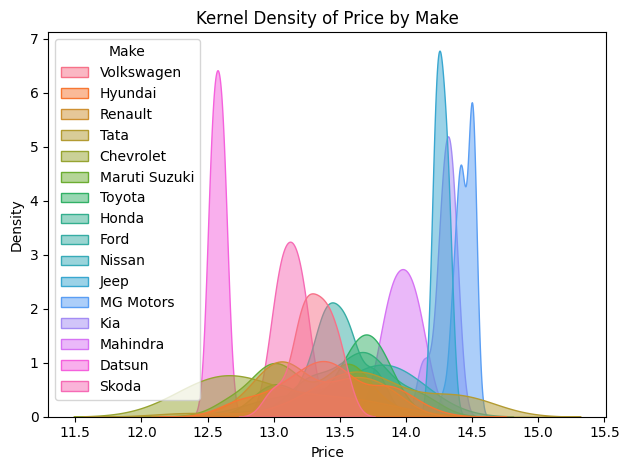

In [14]:
sns.kdeplot(data = cars_df, x = "Price", hue = "Make", fill = True, common_norm = False, alpha = 0.5) #generate plot

plt.title("Kernel Density of Price by Make")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

It looks like MG Motors, Kia, and Jeep are the most expensive car brands. In terms of general car prices, it seems to range from log(12) to log(15) or $160,000 to $3.27 million.

2.3

In [16]:
from sklearn.model_selection import train_test_split #Split the sample
train_df, test_df = train_test_split(cars_df, test_size = 0.2, random_state = 42)

2.4

In [20]:
from sklearn.linear_model import LinearRegression #numeric variables only

y_train = train_df["Price"]
y_test = test_df["Price"]
numeric_vars = ["Mileage_Run", "Make_Year", "No_of_Owners", "Seating_Capacity"]
X_train = train_df[numeric_vars]
X_test = test_df[numeric_vars]

display(X_train.head())

,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity
925,25418,2019,0.693147,1.791759
162,60629,2017,0.693147,1.791759
288,45378,2017,0.693147,1.791759
67,80408,2015,0.693147,1.791759
796,73664,2018,0.693147,1.791759


In [22]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train)) #R^2 train

residuals = y_train - reg.predict(X_train)
print(np.sqrt(np.mean(residuals**2))) #RMSE train

0.4095929761579462
0.3453219290954863


In [24]:
reg_two = LinearRegression().fit(X_test, y_test)
print(reg_two.score(X_test, y_test)) #R^2 test

residuals_two = y_test - reg_two.predict(X_test)
print(np.sqrt(np.mean(residuals_two**2))) #RMSE test

0.27499418136104825
0.35653063243980065


In [25]:
y_train_cat = train_df["Price"] #Categorical variables
y_test_cat = test_df["Price"]
categorical_vars = ["Body_Type", "Fuel_Type", "Transmission", "Transmission_Type"]
X_train_cat = pd.get_dummies(train_df[categorical_vars], drop_first = True)
X_test_cat = pd.get_dummies(test_df[categorical_vars], drop_first = True)

display(X_train_cat.head())

,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
925,True,False,False,False,True,False,True,False,False,False,True
162,False,False,False,False,True,False,True,False,False,False,True
288,False,False,True,False,True,False,True,False,False,False,True
67,True,False,False,False,True,False,True,False,False,False,True
796,False,False,True,False,True,False,True,False,False,False,True


In [26]:
reg_two = LinearRegression().fit(X_test_cat, y_test_cat)
print(reg_two.score(X_test_cat, y_test_cat)) # R^2 test

residuals2=y_test-reg_two.predict(X_test_cat)
print(np.sqrt(np.mean(residuals2**2))) #RMSE test

0.5961626509909985
0.26609048473409075


The second model has a better performance due to a high R^2 value that accounts for more variability and a low RMSE value that can predict closer to the actual values.

In [27]:
X_train_combo = pd.concat([X_train, X_train_cat], axis=1) #Combo of numeric and categorical
X_test_combo = pd.concat([X_test, X_test_cat], axis=1)
X_train_joint, X_test_joint = X_train_combo.align(X_test_combo, join = "left", axis = 1, fill_value = 0)

display(X_train_combo.head())

,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
925,25418,2019,0.693147,1.791759,True,False,False,False,True,False,True,False,False,False,True
162,60629,2017,0.693147,1.791759,False,False,False,False,True,False,True,False,False,False,True
288,45378,2017,0.693147,1.791759,False,False,True,False,True,False,True,False,False,False,True
67,80408,2015,0.693147,1.791759,True,False,False,False,True,False,True,False,False,False,True
796,73664,2018,0.693147,1.791759,False,False,True,False,True,False,True,False,False,False,True


In [29]:
reg_combo = LinearRegression().fit(X_train_joint, y_train) #Fit a new model on the combined training data
print(reg_combo.score(X_test_joint, y_test)) #R^2 test

residuals = y_test - reg_combo.predict(X_test_joint)
print(np.sqrt(np.mean(residuals**2))) #RMSE test

0.7188725632559236
0.22201264960046177


This model performs much better than the previous two models. Specifically, the R^2 test performs better by 0.12, and the RMSE test performs better by 0.05.

2.5

In [35]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

expander = PolynomialFeatures(degree = 3, include_bias = False) #Create the polynomial feature expander (degree 3)

X_train_poly = expander.fit_transform(X_train_joint) #Fit only on training data, then transform both
X_test_poly = expander.transform(X_test_joint)

feature_names = expander.get_feature_names_out(X_train_joint.columns) #Get the new feature names

X_train_poly_df = pd.DataFrame(X_train_poly, columns = feature_names, index = X_train_joint.index) #Create DataFrames for easy inspection
X_test_poly_df = pd.DataFrame(X_test_poly, columns = feature_names, index = X_test_joint.index)

X_train_poly_df.head() #Display first few rows of training set

,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,...,Transmission_7-Speed^3,Transmission_7-Speed^2 Transmission_CVT,Transmission_7-Speed^2 Transmission_Type_Manual,Transmission_7-Speed Transmission_CVT^2,Transmission_7-Speed Transmission_CVT Transmission_Type_Manual,Transmission_7-Speed Transmission_Type_Manual^2,Transmission_CVT^3,Transmission_CVT^2 Transmission_Type_Manual,Transmission_CVT Transmission_Type_Manual^2,Transmission_Type_Manual^3
925,25418.0,2019.0,0.693147,1.791759,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
162,60629.0,2017.0,0.693147,1.791759,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
288,45378.0,2017.0,0.693147,1.791759,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67,80408.0,2015.0,0.693147,1.791759,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,73664.0,2018.0,0.693147,1.791759,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
reg_3= LinearRegression().fit(X_train_poly, y_train)
print(reg_3.score(X_train_poly, y_train)) #R^2 train
residuals_3 = y_train - reg_3.predict(X_train_poly)
print(np.sqrt(np.mean(residuals_3**2))) #RMSE train

0.8080513985275646
0.19689780593293607


In [37]:
reg_4= LinearRegression().fit(X_test_poly, y_test)
print(reg_4.score(X_test_poly, y_test)) #R^2 test
residuals_4 = y_test - reg_4.predict(X_test_poly)
print(np.sqrt(np.mean(residuals_4**2))) #RMSE test

0.834523539154442
0.1703312036586761


Training R^2 increases with the degree as the model gets more flexible. It seems as though Testing R^2 is a better fit when it first rises, but then it drops, which is indicative of overfitting. When the Testing R^2 is less than 0, the model is worse at predicting prices. On the testing set, RMSE also seems to increase after a certain degree. Overall, best R^2 is 0.83 and best RMSE is 0.17. R^2 seems to be better by about 0.1 and RMSE is better by about 0.6.

2.6

The predicted and the actual values on the graph seem to line up pretty well with the trend line. The pattern is pretty consistent throughout the graph.

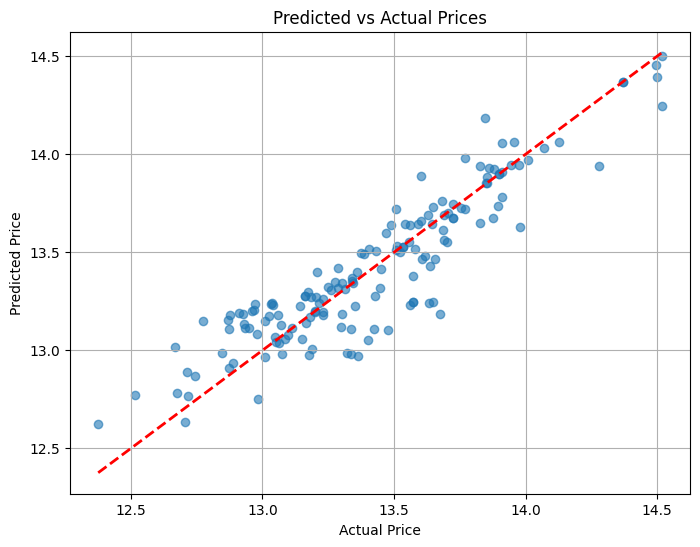

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_best = reg_4.predict(X_test_poly)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_best, alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw = 2)

plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

On the KDE plot, it's centered around 0. A strength is that because there is more data around 0, the model doesn't over/underpredict, which is indicative of low variance. On the other hand, a weakness is that there is a bit of a skew to the left, so maybe there is some overprediction. Additionally, the tails are pretty big, indicating a lot of random error.

<Axes: xlabel='Price', ylabel='Density'>

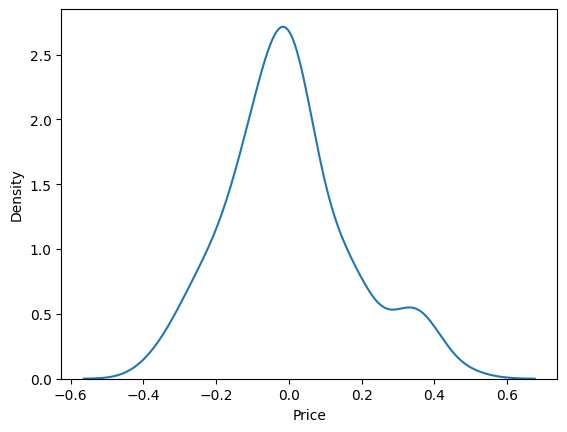

In [40]:
residuals_4 = y_test - y_pred_best
sns.kdeplot(residuals_4)

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

Chose not to do this one.